<a href="https://colab.research.google.com/github/bahu1610/ML-in-Python/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning with Python

In [ ]:
import pandas as pd

In [ ]:
# Loading the dataset and skipping bad lines

crime_data = pd.read_csv("/content/crime.csv", encoding='cp1252',on_bad_lines='skip')

In [ ]:
#Checking the datatypes of the data loaded
crime_data.dtypes

,0
INCIDENT_NUMBER,object
OFFENSE_CODE,int64
OFFENSE_CODE_GROUP,object
OFFENSE_DESCRIPTION,object
DISTRICT,object
REPORTING_AREA,object
SHOOTING,object
OCCURRED_ON_DATE,object
YEAR,int64
MONTH,int64


In [ ]:
# Checking first cell with loc(). loc() can accept the boolean data unlike iloc()
crime_data.loc[1]

,1
INCIDENT_NUMBER,I182070943
OFFENSE_CODE,1402
OFFENSE_CODE_GROUP,Vandalism
OFFENSE_DESCRIPTION,VANDALISM
DISTRICT,C11
REPORTING_AREA,347
SHOOTING,NaN
OCCURRED_ON_DATE,2018-08-21 00:00:00
YEAR,2018
MONTH,8


In [ ]:
# Handling the missing values in the dataframe: Are there any missing values within the dataframe?
# If yes, then how many?

#Checking missing values
crime_data.isnull().sum()

,0
INCIDENT_NUMBER,0
OFFENSE_CODE,0
OFFENSE_CODE_GROUP,0
OFFENSE_DESCRIPTION,0
DISTRICT,1765
REPORTING_AREA,0
SHOOTING,318054
OCCURRED_ON_DATE,0
YEAR,0
MONTH,0


In [ ]:
# Value_Counts: Finding frequency of different values within Shooting field of the dataframe

crime_data["SHOOTING"].value_counts(dropna=False)


,count
SHOOTING,
NaN,318054
Y,1019


In [ ]:
# Fill_na: Filling the missing values within the dataframe, i.e. NaN -->> No
# Replace: Making it a comprehensible dataframe

crime_data["SHOOTING"].fillna('N', inplace = True)
crime_data["SHOOTING"].replace({"Y":"Yes", "N":"No"}, inplace = True)

#Check
crime_data["SHOOTING"].value_counts(dropna=False)

,count
SHOOTING,
No,318054
Yes,1019


In [ ]:
# Checking the Streets Data:

crime_data["STREET"].value_counts(dropna=False)

,count
STREET,
WASHINGTON ST,14194
NaN,10871
BLUE HILL AVE,7794
BOYLSTON ST,7221
DORCHESTER AVE,5149
...,...
MYLES STANDISH RD,1
ROLLINS PL,1
MCLELLAN,1


Here, the street is not a binary value and hence we do not need to have a different startegy for tackling such missing values

In [ ]:
# However as seen earlier our data also has other errors like duplicates.

# Incident_number is the primary key for the data so let's check that

crime_data["INCIDENT_NUMBER"].value_counts(dropna=False)


,count
INCIDENT_NUMBER,
I162030584,13
I152080623,11
I172013170,10
I182065208,10
I172096394,10
...,...
I172059460,1
I172059458,1
I172059457,1


In [ ]:
# Given so many value duplicates, we will check the one of the incident repeated number (3) to get an essence

crime_data[crime_data["INCIDENT_NUMBER"] == "I172055588"].T


,115147,115148,115149
INCIDENT_NUMBER,I172055588,I172055588,I172055588
OFFENSE_CODE,801,2610,613
OFFENSE_CODE_GROUP,Simple Assault,Other,Larceny
OFFENSE_DESCRIPTION,ASSAULT - SIMPLE,TRESPASSING,LARCENY SHOPLIFTING
DISTRICT,C6,C6,C6
REPORTING_AREA,214,214,214
SHOOTING,No,No,No
OCCURRED_ON_DATE,2017-07-02 08:48:00,2017-07-02 08:48:00,2017-07-02 08:48:00
YEAR,2017,2017,2017
MONTH,7,7,7


As seen, same data has been entered multiple times as given a different name under the offense descirption. We need to clear this and keep the best one which is simple to just select the first reported crime

In [ ]:
# Percentage of duplicates?

(1 - (crime_data.INCIDENT_NUMBER.unique().__len__()/crime_data.INCIDENT_NUMBER.count())) * 100

11.456939321095804

In [ ]:
# Drop_duplicates: With 12% duplicated data, let's drop the duplicates

crime_data.drop_duplicates(subset = "INCIDENT_NUMBER", inplace= True, keep = "first")

<ipython-input-67-7365b20b6676>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "DISTRICT", data = crime_data, palette="husl")


<Axes: xlabel='DISTRICT', ylabel='count'>

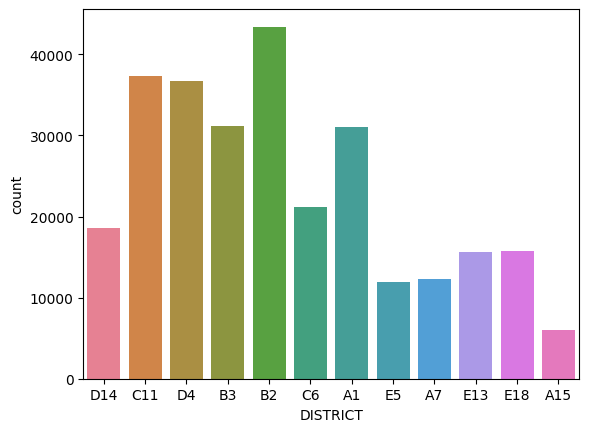

In [ ]:
# Looking at crime_data by the district:

import seaborn as sns

sns.countplot(x = "DISTRICT", data = crime_data, palette="husl")

<ipython-input-68-c597a40d43d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.catplot(x = "HOUR", kind = "count", data = crime_data, palette="husl", aspect=13.7/8.27, legend = False,


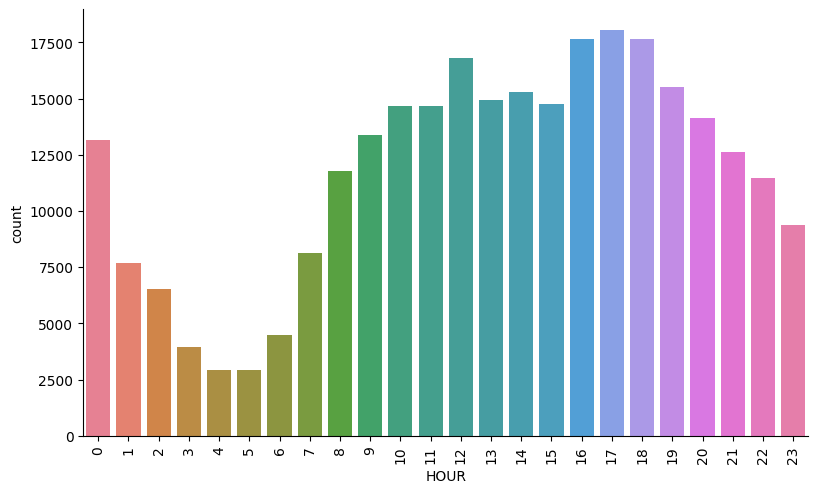

In [ ]:
 a = sns.catplot(x = "HOUR", kind = "count", data = crime_data, palette="husl", aspect=13.7/8.27, legend = False,
            )
 a.set_xticklabels(rotation = 90)

## For Continuous dataset, use catplot, distplot etc

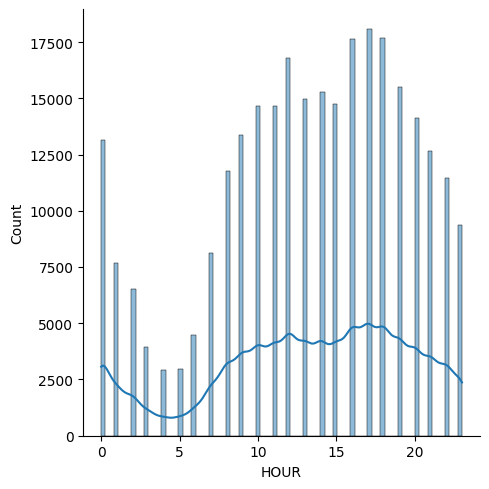

In [ ]:
sns.displot(data=crime_data, x="HOUR", kde=True)

<Axes: xlabel='DISTRICT', ylabel='count'>

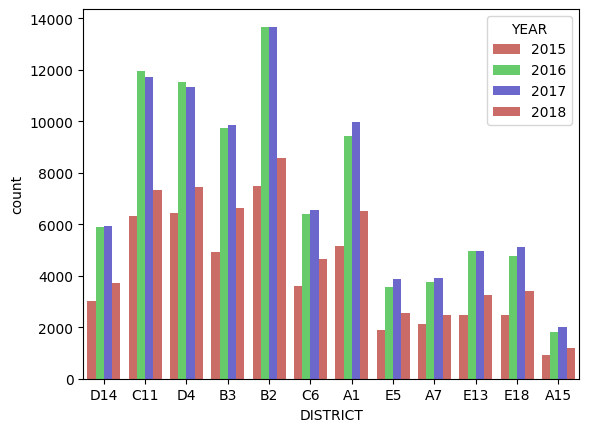

In [ ]:
sns.countplot(data=crime_data, x="DISTRICT", hue = "YEAR", palette = "hls")

In [ ]:
# Dropping useless 2015 year from the dataset

crime_data = crime_data[crime_data["YEAR"].isin([2016,2017,2018])]
crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,No,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,No,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,No,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,No,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,No,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


<Axes: xlabel='DISTRICT', ylabel='count'>

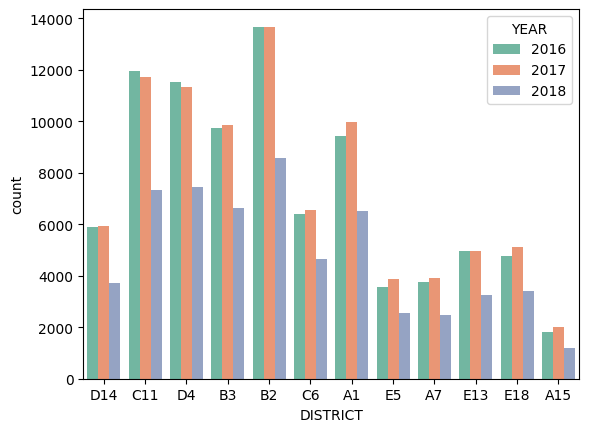

In [ ]:
# Check

sns.countplot(data=crime_data, x = "DISTRICT", hue = "YEAR", palette = "Set2")